Using the NetworkX library in Python, instantiate the graph shown in the image below. You can ignore colors and use a homogeneous node type for all nodes (e.g., TC is a smart contract, but for this task, its type does not matter). The values represent edge weights, and node IDs are labeled within the nodes (e.g., S3A, etc.). Assume that all nodes and edges are present in the graph.  

The coins in this graph flow from left to right along the edges. If an edge is missing a direction, use this flow information to determine its direction. Each edge should be treated as unidirectional.  

Tasks:  
1. Compute the Forman Ricci curvature of each edge in the directed graph.  
2. Use the provided image to annotate curvature values on the edges for demonstration.  
3. Post your code to a GitHub repository and share the link with me.  
4. Include an image of the Ricci curvature-labeled graph in the README file of the repository.  

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

ricci curvature is associated to tangent vectors i.e. edges
forman-ricci -> dispersion of deodesics
ricci curvature controls
- average dispersion of geodesics along tangent directions
- the growth of volumes of distance balls (volume growth)

In [3]:
#create the directed graph
G = nx.DiGraph()

In [5]:
#add nodes
nodes = ['S3A', 'S3B', 'S3G', 'S3H', 'S2C', 'S2D', 'S2I', 'S1E','S1L', 'TC', 'R1K', 'R1M', 'R2N', 'R2O', 'R3R', 'R3S', 'R3T']
G.add_nodes_from(nodes)

In [7]:
#add weighted edges
edges = [
    ('S3A', 'S2C', 1),
    ('S3B', 'S2D', 3),
    ('S3G', 'S2I', 1),
    ('S3H', 'S2I', 2),
    #level 1^
    ('S2C', 'S1E', 2),
    ('S2C', 'R1K', 1),
    ('S2D', 'S1E', 2),
    ('S2I', 'S1L', 4),
    ('S2I', 'R1K', 6),
    ('S2I', 'R1M', 5),
    #level 2^
    ('S1E', 'TC', 3),
    ('S1L', 'TC', 6),
    #level 3^
    ('TC', 'R1K', 4),
    ('TC', 'R1M', 3),
    #level 4^
    ('R1K', 'R2N', 4),
    ('R1M', 'R2O', 2),
    #level 5^
    ('R2N', 'R3R', 1),
    ('R2N', 'R3S', 5),
    ('R2O', 'R3T', 4),
    #level 6^
    ('R3S', 'R3T', 2),
]

G.add_weighted_edges_from(edges)

In [9]:
#compute forman ricci curvature
def comp_form_ricci_curve(G):
    curvedict = {}    
    for u, v, data in G.edges(data=True):
        w = data['weight']
        deg_u = G.degree(u)
        deg_v = G.degree(v)
        curvecalc = (deg_u + deg_v - 2 * w) / w
        curvedict[(u, v)] = curvecalc
    return curvedict

In [11]:
curvedict = comp_form_ricci_curve(G)

# Convert to pd
curve_df = pd.DataFrame(list(curvedict.items()), columns=['Edge', 'F-R Curvature'])
print(curve_df)

          Edge  F-R Curvature
0   (S3A, S2C)       2.000000
1   (S3B, S2D)      -1.000000
2   (S3G, S2I)       4.000000
3   (S3H, S2I)       1.000000
4   (S2C, S1E)       1.000000
5   (S2C, R1K)       5.000000
6   (S2D, S1E)       0.500000
7   (S2I, S1L)      -0.250000
8   (S2I, R1K)      -0.500000
9   (S2I, R1M)      -0.400000
10   (S1E, TC)       0.333333
11   (S1L, TC)      -1.000000
12   (TC, R1K)       0.000000
13   (TC, R1M)       0.333333
14  (R1K, R2N)      -0.250000
15  (R1M, R2O)       0.500000
16  (R2N, R3R)       2.000000
17  (R2N, R3S)      -1.000000
18  (R2O, R3T)      -1.000000
19  (R3S, R3T)       0.000000


In [13]:
#add curve values
pos = nx.kamada_kawai_layout(G)

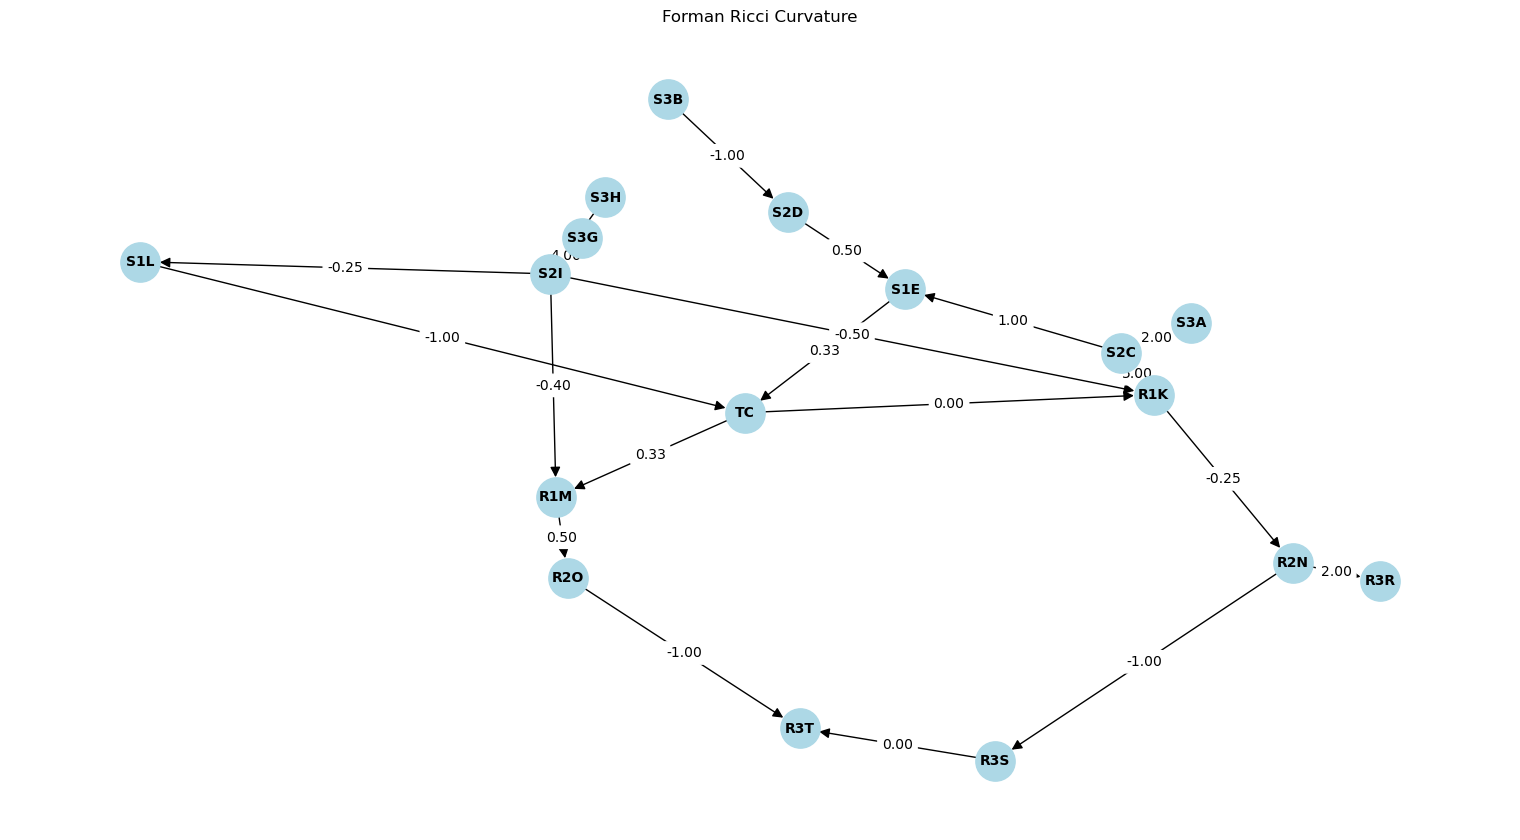

In [15]:
#plot graph
plt.figure(figsize=(15,8)) #100,90
nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=15)
edge_labels = {(u, v): f'{curvecalc:.2f}' for (u, v), curvecalc in curvedict.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, rotate=False) 
plt.title("Forman Ricci Curvature")
plt.show()


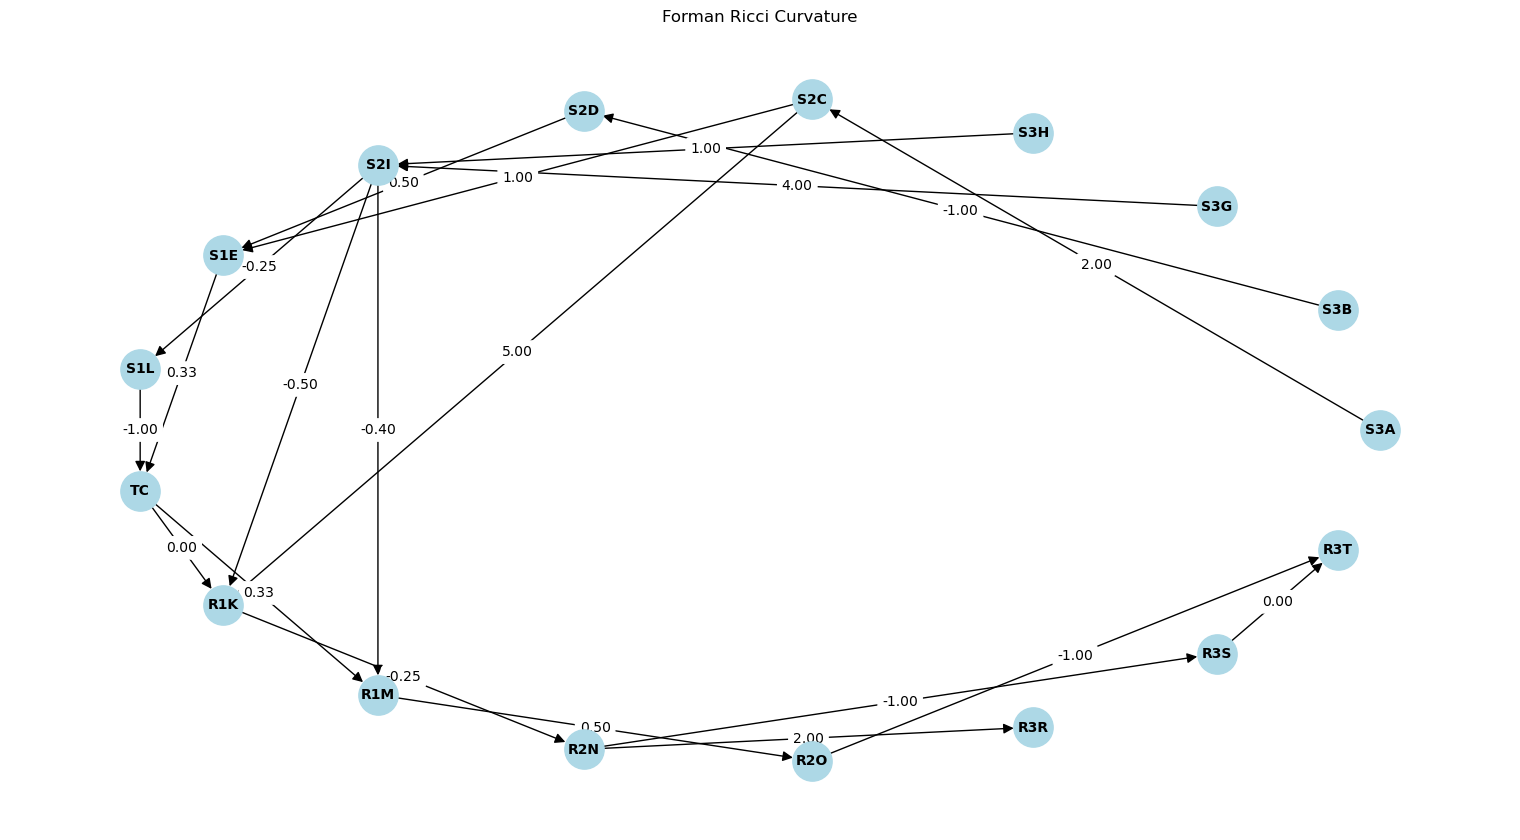

In [17]:
#add curve values
pos = nx.circular_layout(G)
#plot graph
plt.figure(figsize=(15,8)) #100,90
nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=15)
edge_labels = {(u, v): f'{curvecalc:.2f}' for (u, v), curvecalc in curvedict.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, rotate=False) 
plt.title("Forman Ricci Curvature")
plt.show()